# Training the model using Logistic Regression

In [0]:
import io 
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


# Logistic Regression

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/Combined_News_DJIA.csv')

In [0]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

## 1.1 Logistic with a bag of words

In [0]:
# Logistic Regression. bag of Words
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [0]:
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)

In [0]:
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [0]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,61,125
1,92,100


In [0]:
basicwords = basicvectorizer.get_feature_names()
basiccoeffs = basicmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(10)

,Word,Coefficient
19419,nigeria,0.503538
25261,self,0.461840
15998,korea,0.434100
20135,olympics,0.426051
29286,tv,0.425961
26323,so,0.418052
15843,kills,0.408257
10874,fears,0.397948
29256,turn,0.394086
28274,territory,0.383941


In [0]:
coeffdf.tail(10)

,Word,Coefficient
8478,did,-0.429552
27299,students,-0.430813
6683,congo,-0.433603
12818,hacking,-0.450196
7139,country,-0.451684
16949,low,-0.465086
3651,begin,-0.471195
25433,sex,-0.494124
24754,sanctions,-0.550064
24542,run,-0.599433


## 1.2 Logistic using ngram

In [0]:
# Logistic Regression. n-gram Words
advancedvectorizer = CountVectorizer(ngram_range=(2, 2))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)

advancedmodel = LogisticRegression(max_iter=1200000)
advancedmodel = advancedmodel.fit(advancedtrain, train["Label"])

In [0]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
advpredictions = advancedmodel.predict(advancedtest)
# testheadlines

In [0]:
pd.crosstab(test["Label"], advpredictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,62,124
1,43,149


In [0]:
from sklearn.metrics import classification_report
report = classification_report(test['Label'], advpredictions, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])

positive:  {'precision': 0.5457875457875457, 'recall': 0.7760416666666666, 'f1-score': 0.6408602150537633, 'support': 192}
negative:  {'precision': 0.5904761904761905, 'recall': 0.3333333333333333, 'f1-score': 0.4261168384879725, 'support': 186}


In [0]:
advwords = advancedvectorizer.get_feature_names()
advcoeffs = advancedmodel.coef_.tolist()[0]
advcoeffdf = pd.DataFrame({'Words' : advwords, 
                        'Coefficient' : advcoeffs})
advcoeffdf = advcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
advcoeffdf.head(10)

,Words,Coefficient
272047,right to,0.282174
24710,and other,0.272983
285392,set to,0.269663
316194,the first,0.261189
157511,in china,0.220215
159522,in south,0.217995
124411,forced to,0.214278
125870,found in,0.211413
173246,it has,0.208463
214955,new zealand,0.204277


In [0]:
advcoeffdf.tail(10)

,Words,Coefficient
118707,fire on,-0.203264
326846,to help,-0.203980
155038,if he,-0.209366
242528,people are,-0.214941
31669,around the,-0.215376
321333,there is,-0.216367
327113,to kill,-0.224369
340714,up in,-0.228230
358917,with iran,-0.230281
315485,the country,-0.334778


# 1.3 Sentiment analysis for NYtimes Using Logistic

In [0]:
nyt_df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/Data/nytimes.xlsx')

In [0]:
nyt_df

,pub_date,abstract,lead_paragraph,snippet
0,2014-01-01T00:55:23+0000,"Despite turbulence in Washington, China and Eu...",It was the market rally that defied gravity an...,"Despite turbulence in Washington, China and Eu..."
1,2014-01-06T20:43:12+0000,"A look back at gold, home prices and stocks in...","I’m not big on market predictions. In fact, if...","A look back at gold, home prices and stocks in..."
2,2014-01-06T14:19:19+0000,JPMorgan Chase nears $2 billion settlement in ...,JPMorgan Chase is starting the year the same w...,JPMorgan Chase nears $2 billion settlement in ...
3,2014-01-02T21:02:37+0000,"The deal, melding detection of hacking with so...",SAN FRANCISCO — In a deal that may have broad ...,"The deal, melding detection of hacking with so..."
4,2014-01-07T01:28:13+0000,Some graphic designers are trying to improve p...,"Like many designers, Eric Rodenbeck has had a ...",Some graphic designers are trying to improve p...
...,...,...,...,...
1697,2020-02-22T18:56:15+0000,A paramedic was treating Ryan Newman inside hi...,LAS VEGAS — A paramedic was treating Ryan Newm...,A paramedic was treating Ryan Newman inside hi...
1698,2020-02-21T23:59:23+0000,"NASCAR rolled west this week, shifting from th...","LAS VEGAS — NASCAR rolled west this week, shif...","NASCAR rolled west this week, shifting from th..."
1699,2020-02-23T18:56:13+0000,Ryan Newman said he suffered a head injury in ...,LAS VEGAS — Ryan Newman said he suffered a hea...,Ryan Newman said he suffered a head injury in ...
1700,2020-02-20T00:11:11+0000,Driver Ryan Newman was released from the hospi...,(Reuters) - Driver Ryan Newman was released fr...,Driver Ryan Newman was released from the hospi...


In [0]:
snippets = nyt_df.snippet.fillna("Empty").tolist()
lead = nyt_df.lead_paragraph.dropna().tolist()
abstract = nyt_df.abstract.dropna().tolist()
len(abstract)

1702

In [0]:
ny_test = advancedvectorizer.transform(abstract)
ny_predict = advancedmodel.predict(ny_test)


In [0]:
nyt_df['Predicted'] = list(ny_predict)

In [0]:
nyt_df

,pub_date,abstract,lead_paragraph,snippet,Predicted
0,2014-01-01T00:55:23+0000,"Despite turbulence in Washington, China and Eu...",It was the market rally that defied gravity an...,"Despite turbulence in Washington, China and Eu...",1
1,2014-01-06T20:43:12+0000,"A look back at gold, home prices and stocks in...","I’m not big on market predictions. In fact, if...","A look back at gold, home prices and stocks in...",1
2,2014-01-06T14:19:19+0000,JPMorgan Chase nears $2 billion settlement in ...,JPMorgan Chase is starting the year the same w...,JPMorgan Chase nears $2 billion settlement in ...,1
3,2014-01-02T21:02:37+0000,"The deal, melding detection of hacking with so...",SAN FRANCISCO — In a deal that may have broad ...,"The deal, melding detection of hacking with so...",1
4,2014-01-07T01:28:13+0000,Some graphic designers are trying to improve p...,"Like many designers, Eric Rodenbeck has had a ...",Some graphic designers are trying to improve p...,1
...,...,...,...,...,...
1697,2020-02-22T18:56:15+0000,A paramedic was treating Ryan Newman inside hi...,LAS VEGAS — A paramedic was treating Ryan Newm...,A paramedic was treating Ryan Newman inside hi...,1
1698,2020-02-21T23:59:23+0000,"NASCAR rolled west this week, shifting from th...","LAS VEGAS — NASCAR rolled west this week, shif...","NASCAR rolled west this week, shifting from th...",1
1699,2020-02-23T18:56:13+0000,Ryan Newman said he suffered a head injury in ...,LAS VEGAS — Ryan Newman said he suffered a hea...,Ryan Newman said he suffered a head injury in ...,0
1700,2020-02-20T00:11:11+0000,Driver Ryan Newman was released from the hospi...,(Reuters) - Driver Ryan Newman was released fr...,Driver Ryan Newman was released from the hospi...,1


# Sentiment Analysis using SVM

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn.metrics import classification_report

## 2.1 Using Tfidf Vectorizer

In [0]:
# Create feature vectors
svm_tfidf_vectorizer = TfidfVectorizer(min_df = 5, ngram_range=(2,3),
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

# vectorizer = TfidfVectorizer(ngram_range=(2,2))
train_vectors = svm_tfidf_vectorizer.fit_transform(trainheadlines)
test_vectors = svm_tfidf_vectorizer.transform(testheadlines)

In [0]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, train["Label"])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test['Label'], prediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])

Training time: 5.787554s; Prediction time: 1.270473s
positive:  {'precision': 0.5346153846153846, 'recall': 0.7239583333333334, 'f1-score': 0.6150442477876106, 'support': 192}
negative:  {'precision': 0.5508474576271186, 'recall': 0.34946236559139787, 'f1-score': 0.4276315789473684, 'support': 186}


In [0]:
pd.crosstab(test["Label"], prediction_linear, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,65,121
1,53,139


## 2.2 Using CountVectorizer

In [0]:
advtrain_vectors = advancedvectorizer.fit_transform(trainheadlines)
advtest_vectors = advancedvectorizer.transform(testheadlines)

In [0]:
advclassifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
advclassifier_linear.fit(advtrain_vectors, train["Label"])
t1 = time.time()
advprediction_linear = advclassifier_linear.predict(advtest_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test['Label'], advprediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])

Training time: 14.463303s; Prediction time: 2.325027s
positive:  {'precision': 0.547244094488189, 'recall': 0.7239583333333334, 'f1-score': 0.6233183856502242, 'support': 192}
negative:  {'precision': 0.5725806451612904, 'recall': 0.3817204301075269, 'f1-score': 0.45806451612903226, 'support': 186}


In [0]:
pd.crosstab(test["Label"], advprediction_linear, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,71,115
1,53,139


## 2.3 Another SVM model (NOT WORKING)
https://www.kaggle.com/lbronchal/sentiment-analysis-with-svm

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words("english")) 

svm_vectorizer2 = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(2, 2),
    # stop_words = en_stopwords)
)

In [0]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.01, 0.1, 1, 10, 100], 'gamma': np.logspace(-3, 2, 20), 'kernel': ['rbf']},
 ]

In [0]:
np.random.seed(1)

pipeline_svm = make_pipeline(svm_vectorizer2, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(trainheadlines, train["Label"])
grid_svm.score(testheadlines, test["Label"])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.7min finished


0.5666442652329748

In [0]:
pd.crosstab(test["Label"],grid_svm.best_estimator_.predict(testheadlines), rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,70,116
1,56,136


In [0]:
grid_svm.best_params_

{'svc__C': 0.01}

In [0]:
grid_svm.best_score_

0.5086958383939383

In [0]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [0]:
report_results(grid_svm.best_estimator_, testheadlines, test["Label"])

{'acc': 0.544973544973545,
 'auc': 0.43335573476702505,
 'f1': 0.6126126126126126,
 'precision': 0.5396825396825397,
 'recall': 0.7083333333333334}

In [0]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [0]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, testheadlines, test["Label"])

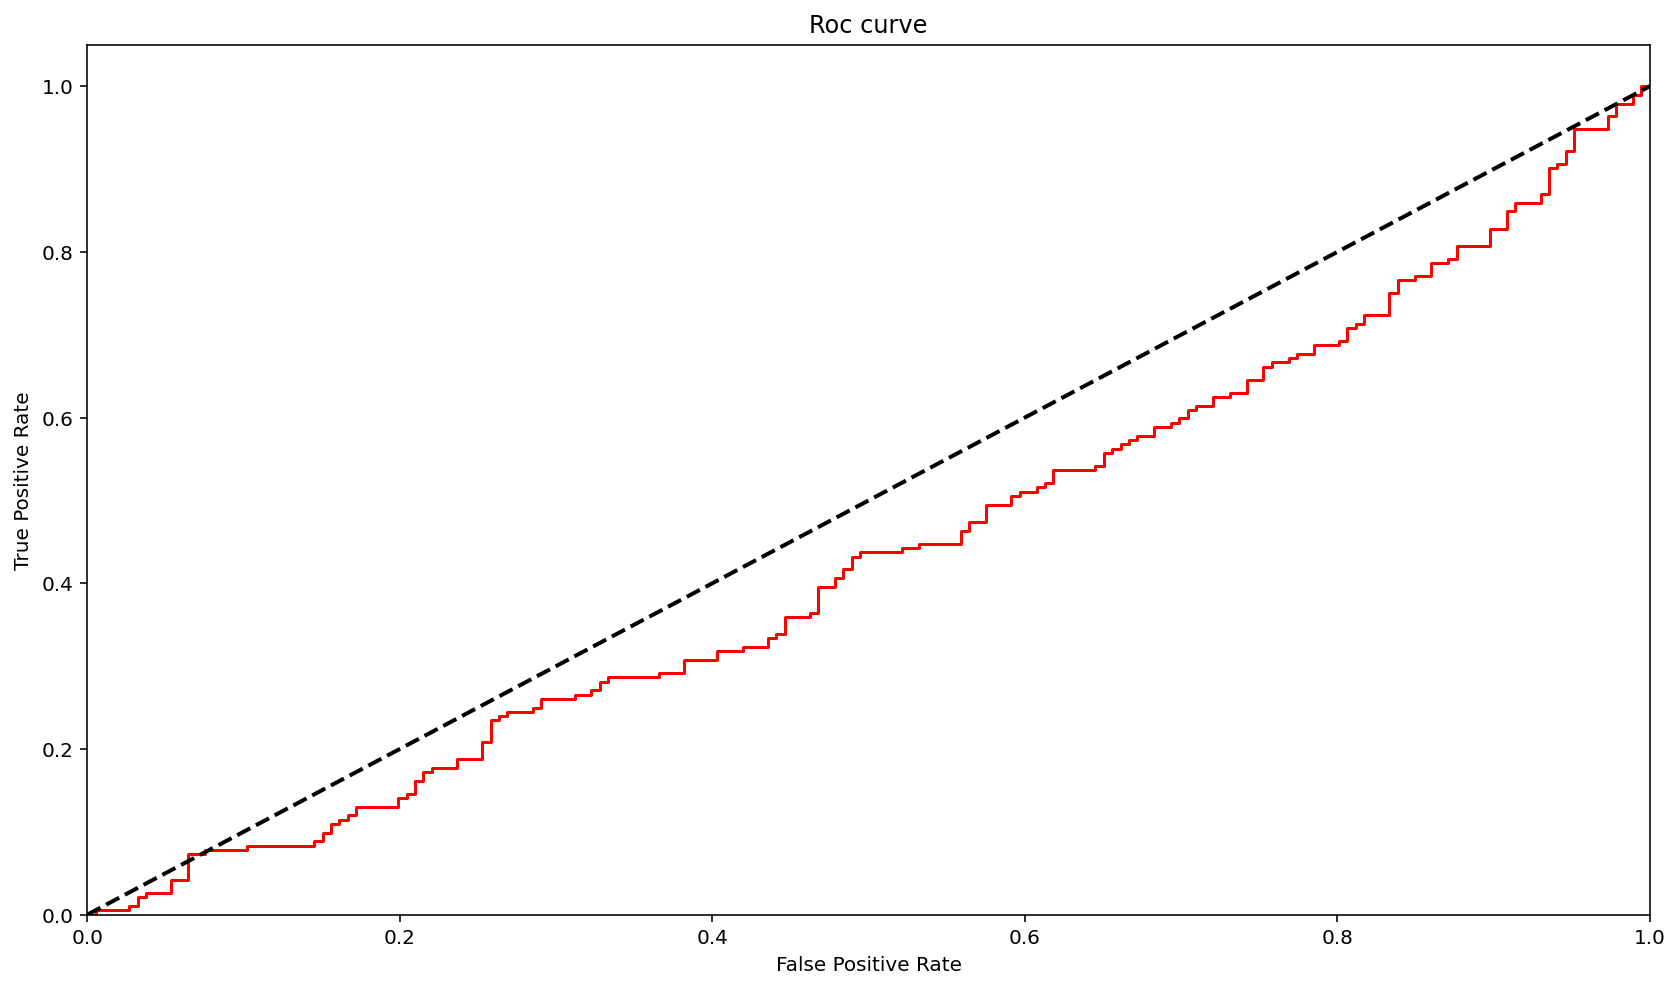

In [0]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

### 2.3.1 Finding if there is bias

In [0]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, trainheadlines, train["Label"], cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [0]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

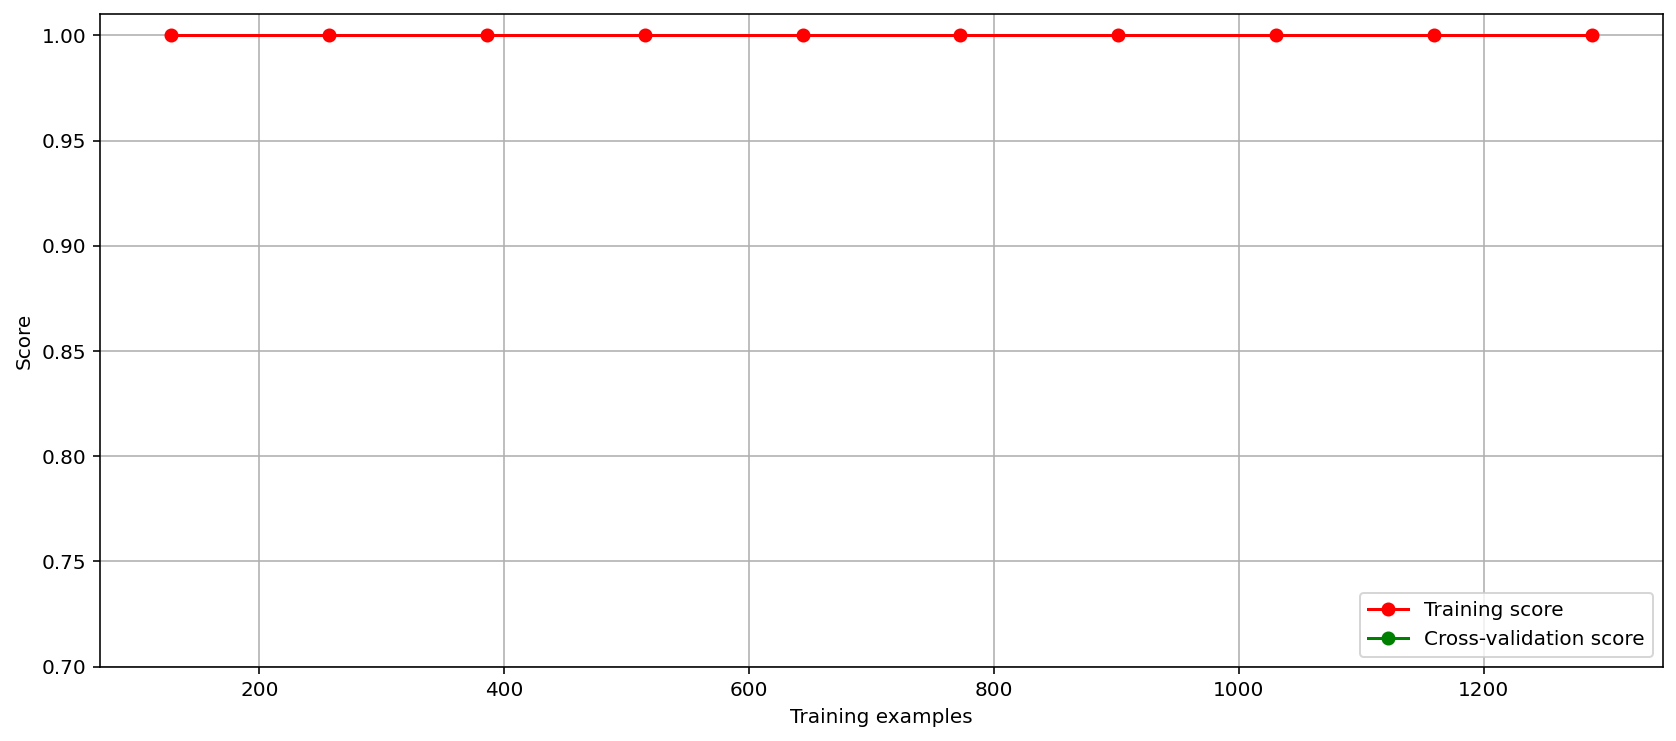

In [0]:
plot_learning_curve(trainheadlines, train["Label"], train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()

# NY test

## 3.1 TF-IDF

In [0]:
ny_tfidf = svm_tfidf_vectorizer.transform(abstract)
ny_prediction_linear =  classifier_linear.predict(ny_tfidf)
nyt_df["SVM Predict IDF"] = list(ny_prediction_linear)

## 3.2 Count Vectorizer

In [0]:
adv_ny = advancedvectorizer.transform(abstract)
adv_ny_prediction_linear =  advclassifier_linear.predict(adv_ny)
nyt_df["SVM Predict Count"] = list(adv_ny_prediction_linear)

## 3.3 Using another SVM Model

### 3.3.1 Original

In [0]:
ny_pred_svm_vectorizer2 = grid_svm.predict(abstract)


### 3.3.2 Count

In [0]:
pipeline_svm_avd = make_pipeline(advancedvectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm_adv = GridSearchCV(pipeline_svm_avd,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm_adv.fit(trainheadlines, train["Label"])
ny_pred_svm_adv = grid_svm_adv.predict(abstract)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.2min finished


In [0]:
grid_svm_adv.score(testheadlines, test["Label"])

0.59100582437276

In [0]:
nyt_df 

,pub_date,abstract,lead_paragraph,snippet,Predicted,SVM Predict IDF,SVM Predict Count
0,2014-01-01T00:55:23+0000,"Despite turbulence in Washington, China and Eu...",It was the market rally that defied gravity an...,"Despite turbulence in Washington, China and Eu...",1,0,1
1,2014-01-06T20:43:12+0000,"A look back at gold, home prices and stocks in...","I’m not big on market predictions. In fact, if...","A look back at gold, home prices and stocks in...",1,0,1
2,2014-01-06T14:19:19+0000,JPMorgan Chase nears $2 billion settlement in ...,JPMorgan Chase is starting the year the same w...,JPMorgan Chase nears $2 billion settlement in ...,1,1,1
3,2014-01-02T21:02:37+0000,"The deal, melding detection of hacking with so...",SAN FRANCISCO — In a deal that may have broad ...,"The deal, melding detection of hacking with so...",1,1,1
4,2014-01-07T01:28:13+0000,Some graphic designers are trying to improve p...,"Like many designers, Eric Rodenbeck has had a ...",Some graphic designers are trying to improve p...,1,1,1
...,...,...,...,...,...,...,...
1697,2020-02-22T18:56:15+0000,A paramedic was treating Ryan Newman inside hi...,LAS VEGAS — A paramedic was treating Ryan Newm...,A paramedic was treating Ryan Newman inside hi...,1,0,1
1698,2020-02-21T23:59:23+0000,"NASCAR rolled west this week, shifting from th...","LAS VEGAS — NASCAR rolled west this week, shif...","NASCAR rolled west this week, shifting from th...",1,0,1
1699,2020-02-23T18:56:13+0000,Ryan Newman said he suffered a head injury in ...,LAS VEGAS — Ryan Newman said he suffered a hea...,Ryan Newman said he suffered a head injury in ...,0,0,0
1700,2020-02-20T00:11:11+0000,Driver Ryan Newman was released from the hospi...,(Reuters) - Driver Ryan Newman was released fr...,Driver Ryan Newman was released from the hospi...,1,1,1
